In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly

In [ ]:
data= pd.read_excel("/content/Data_for_ANN_using_linspace_generalized_data.xlsx")    # reading the dataset

In [ ]:
data.columns=["x1", "x2", "x3", "x4", "Y"]     # assigning of column names

In [ ]:
data

,x1,x2,x3,x4,Y
0,-20.0000,-19.9999,-19.9998,-19.9997,-124675.752602
1,-19.9996,-19.9995,-19.9994,-19.9993,-124670.883061
2,-19.9992,-19.9991,-19.9990,-19.9989,-124666.013615
3,-19.9988,-19.9987,-19.9986,-19.9985,-124661.144264
4,-19.9984,-19.9983,-19.9982,-19.9981,-124656.275008
...,...,...,...,...,...
99995,19.9981,19.9982,19.9983,19.9984,-112896.116112
99996,19.9985,19.9986,19.9987,19.9988,-112900.750143
99997,19.9989,19.9990,19.9991,19.9992,-112905.384270
99998,19.9993,19.9994,19.9995,19.9996,-112910.018491


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()        # Here minmaxscaler is one of technique which can be used for Normalizing the data to same scale
scaled_data= scaler.fit_transform(data.values) # output form: array

In [ ]:
scaled_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00001000e-05, 1.00001000e-05, 1.00001000e-05, 1.00001000e-05,
        3.90339140e-05],
       [2.00002000e-05, 2.00002000e-05, 2.00002000e-05, 2.00002000e-05,
        7.80670662e-05],
       ...,
       [9.99980000e-01, 9.99980000e-01, 9.99980000e-01, 9.99980000e-01,
        9.43504851e-02],
       [9.99990000e-01, 9.99990000e-01, 9.99990000e-01, 9.99990000e-01,
        9.43133375e-02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        9.42761891e-02]])

In [ ]:
scaled_data.shape

(100000, 5)

In [ ]:
X= scaled_data[:, 0:4]
Y= scaled_data[:, 4]          # slicing of required input and output

In [ ]:
X

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00001e-05, 1.00001e-05, 1.00001e-05, 1.00001e-05],
       [2.00002e-05, 2.00002e-05, 2.00002e-05, 2.00002e-05],
       ...,
       [9.99980e-01, 9.99980e-01, 9.99980e-01, 9.99980e-01],
       [9.99990e-01, 9.99990e-01, 9.99990e-01, 9.99990e-01],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]])

In [ ]:
Y

array([0.00000000e+00, 3.90339140e-05, 7.80670662e-05, ...,
       9.43504851e-02, 9.43133375e-02, 9.42761891e-02])

In [ ]:
from sklearn.model_selection import train_test_split    # import of train_test_split

In [ ]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.2)     # train_size= 70%----->7000 training samples


In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size= 0.5)    # test_size==15% ----> 2550 training samples

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)          # shapes of each set of splitted data
print(X_test.shape), print(y_test.shape)

(20000, 4)
(20000,)
(40000, 4)
(40000,)
(40000, 4)
(40000,)


(None, None)

# Adam Model case 3

In [ ]:
from tensorflow import keras    

def create_nn():     #function of NN model creation
    # Input layer
    inputs = keras.Input(shape=(X.shape[1],), name='input')      # Since n= 4,  in input layer shape= 4--->X.shape[1]

    # Dense layers                                              # hidden layers
    layers_dense = keras.layers.Dense(64, 'linear')(inputs)          # here 20(nodes) --->units    # Activation_function -->sigmoid
    layers_dense = keras.layers.Dense(128, 'sigmoid')(layers_dense)
    layers_dense = keras.layers.Dense(128, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(128, 'sigmoid')(layers_dense)  
    layers_dense = keras.layers.Dense(1, 'linear')(layers_dense)                                                              # here 50(nodes) --->units    # Activation_function---->linear

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)              # only one node for output layer

    return keras.Model(inputs=inputs, outputs=outputs, name="Prediction")

model = create_nn()

In [ ]:
model.summary()      # return the summary of all layers of model

Model: "Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
 dense_5 (Dense)             (None, 1)                 2

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='mse',      #mse---> mean square error
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=75)    # epochs--->iteration

Epoch 1/75
625/625 [==============================] - 2s 2ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254
Epoch 2/75
625/625 [==============================] - 1s 2ms/step - loss: 1.2944e-04 - root_mean_squared_error: 0.0114
Epoch 3/75
625/625 [==============================] - 1s 2ms/step - loss: 6.0993e-05 - root_mean_squared_error: 0.0078
Epoch 4/75
625/625 [==============================] - 2s 3ms/step - loss: 9.2315e-05 - root_mean_squared_error: 0.0096
Epoch 5/75
625/625 [==============================] - 2s 3ms/step - loss: 1.2955e-04 - root_mean_squared_error: 0.0114
Epoch 6/75
625/625 [==============================] - 1s 2ms/step - loss: 1.8399e-04 - root_mean_squared_error: 0.0136
Epoch 7/75
625/625 [==============================] - 1s 2ms/step - loss: 1.3847e-04 - root_mean_squared_error: 0.0118
Epoch 8/75
625/625 [==============================] - 1s 2ms/step - loss: 6.9823e-05 - root_mean_squared_error: 0.0084
Epoch 9/75
625/625 [==============================] 

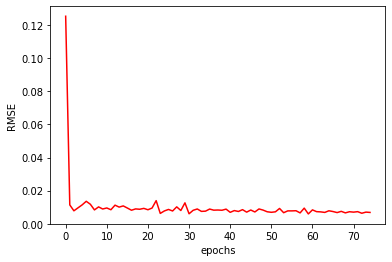

In [ ]:
def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics], color= "r")
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
plot_history('root_mean_squared_error')

In [ ]:
y_train_predicted = model.predict(X_train)     # y_train predicted
y_test_predicted = model.predict(X_test)      #  y_test_predicted

1250/1250 [==============================] - 2s 1ms/step


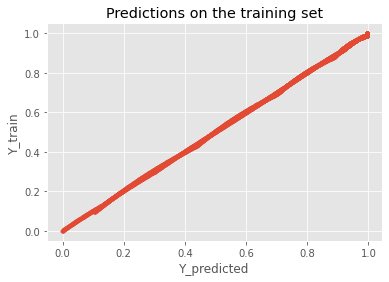

In [ ]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("Y_predicted")
    plt.ylabel("Y_train")                          # sactter plot for Y_train_predicted and True_Y_train
    plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

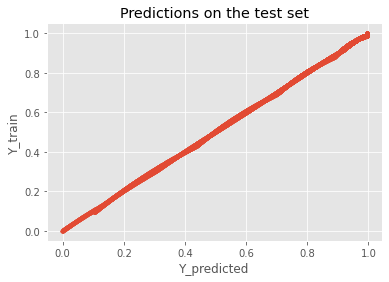

In [ ]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')    # Plot between Y_test_predicted and True_Y_test_predicted

In [ ]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))

1250/1250 [==============================] - 2s 1ms/step - loss: 2.0016e-05 - root_mean_squared_error: 0.0045
Train RMSE: 0.00, Test RMSE: 0.00


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,                # Training of Model along with Validation data
                    epochs=75,
                    validation_data=(X_valid, y_valid))

Epoch 1/75
625/625 [==============================] - 4s 6ms/step - loss: 1.5082e-05 - root_mean_squared_error: 0.0039 - val_loss: 2.5397e-05 - val_root_mean_squared_error: 0.0050
Epoch 2/75
625/625 [==============================] - 4s 6ms/step - loss: 2.1500e-05 - root_mean_squared_error: 0.0046 - val_loss: 1.8380e-05 - val_root_mean_squared_error: 0.0043
Epoch 3/75
625/625 [==============================] - 3s 5ms/step - loss: 4.5342e-05 - root_mean_squared_error: 0.0067 - val_loss: 5.6645e-06 - val_root_mean_squared_error: 0.0024
Epoch 4/75
625/625 [==============================] - 3s 5ms/step - loss: 1.7770e-05 - root_mean_squared_error: 0.0042 - val_loss: 1.0520e-05 - val_root_mean_squared_error: 0.0032
Epoch 5/75
625/625 [==============================] - 4s 6ms/step - loss: 2.1350e-05 - root_mean_squared_error: 0.0046 - val_loss: 8.1499e-06 - val_root_mean_squared_error: 0.0029
Epoch 6/75
625/625 [==============================] - 4s 6ms/step - loss: 5.5388e-05 - root_mean_squ

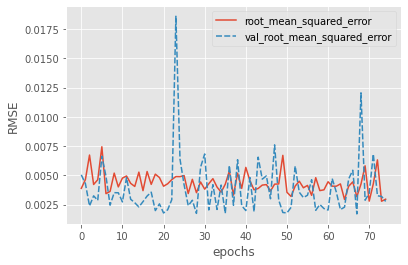

In [ ]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])   

In [ ]:
from sklearn.metrics import r2_score
r2_score_training_set_for_adam_model_case_3= r2_score(y_train, y_train_predicted)
print("the R2 score for training set of the adam model case 3 is :", r2_score_training_set_for_adam_model_case_3)

the R2 score for training set of the adam model case 3 is : 0.9997561307327238


In [ ]:
r2_score_testing_set_adam_model_case_3= r2_score(y_test, y_test_predicted)
print("the r2 score for testing set of adam model case 3 is:", r2_score_testing_set_adam_model_case_3)

the r2 score for testing set of adam model case 3 is: 0.9997556081204099


# RMSprop Model Case 3

In [ ]:
from tensorflow import keras    

def create_nn():     #function of NN model creation
    # Input layer
    inputs = keras.Input(shape=(X.shape[1],), name='input')      # Since n= 4,  in input layer shape= 4--->X.shape[1]

    # Dense layers                                              # hidden layers
    layers_dense = keras.layers.Dense(64, 'linear')(inputs)          # here 20(nodes) --->units    # Activation_function -->sigmoid
    layers_dense = keras.layers.Dense(128, 'sigmoid')(layers_dense)
    layers_dense = keras.layers.Dense(128, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(128, 'sigmoid')(layers_dense)
    layers_dense = keras.layers.Dense(1, 'linear')(layers_dense)
    # here 50(nodes) --->units    # Activation_function---->linear

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)              # only one node for output layer

    return keras.Model(inputs=inputs, outputs=outputs, name="Prediction")

model = create_nn()

In [ ]:
model.summary()      # return the summary of all layers of model

Model: "Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
 dense_11 (Dense)            (None, 1)                 2

In [ ]:
def compile_model(model):
    model.compile(optimizer='RMSprop',
                  loss='mse',      #mse---> mean square error
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=75)    # epochs--->iteration

Epoch 1/75
625/625 [==============================] - 3s 4ms/step - loss: 0.0356 - root_mean_squared_error: 0.1887
Epoch 2/75
625/625 [==============================] - 2s 3ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812
Epoch 3/75
625/625 [==============================] - 2s 2ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637
Epoch 4/75
625/625 [==============================] - 2s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589
Epoch 5/75
625/625 [==============================] - 2s 3ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 6/75
625/625 [==============================] - 3s 4ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 7/75
625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514
Epoch 8/75
625/625 [==============================] - 4s 7ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496
Epoch 9/75
625/625 [==============================] - 2s 2ms/step - loss: 0.0023

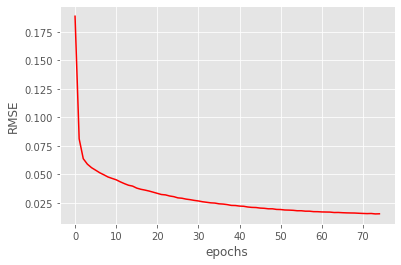

In [ ]:
def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics], color= "r")
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
plot_history('root_mean_squared_error')

In [ ]:
y_train_predicted = model.predict(X_train)     # y_train predicted
y_test_predicted = model.predict(X_test)      #  y_test_predicted

1250/1250 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score_train_set_RMSprop_model_case_3= r2_score(y_train, y_train_predicted)
print("The r2 score of training set for RMSprop model case 3 is:", r2_score_train_set_RMSprop_model_case_3)

The r2 score of training set for RMSprop model case 3 is: 0.9989618274285231


In [ ]:
r2_score_testing_set_RMSprop_model_case_3= r2_score(y_test, y_test_predicted)
print("The r2 score of testing set for RMSprop model case 3 is:", r2_score_train_set_RMSprop_model_case_3)

The r2 score of testing set for RMSprop model case 3 is: 0.9989618274285231


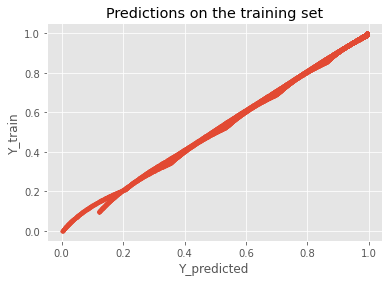

In [ ]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("Y_predicted")
    plt.ylabel("Y_train")                          # sactter plot for Y_train_predicted and True_Y_train
    plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

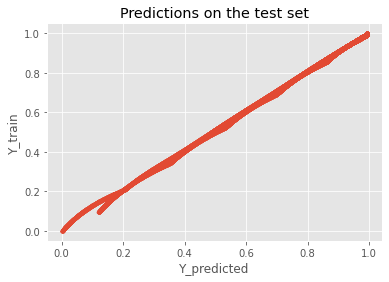

In [ ]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')    # Plot between Y_test_predicted and True_Y_test_predicted

In [ ]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))

1250/1250 [==============================] - 2s 2ms/step - loss: 8.5645e-05 - root_mean_squared_error: 0.0093
Train RMSE: 0.01, Test RMSE: 0.01


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,                # Training of Model along with Validation data
                    epochs=75,
                    validation_data=(X_valid, y_valid))

Epoch 1/75
625/625 [==============================] - 5s 8ms/step - loss: 2.2910e-04 - root_mean_squared_error: 0.0151 - val_loss: 4.7592e-04 - val_root_mean_squared_error: 0.0218
Epoch 2/75
625/625 [==============================] - 5s 8ms/step - loss: 2.2575e-04 - root_mean_squared_error: 0.0150 - val_loss: 8.0221e-05 - val_root_mean_squared_error: 0.0090
Epoch 3/75
625/625 [==============================] - 6s 9ms/step - loss: 2.2415e-04 - root_mean_squared_error: 0.0150 - val_loss: 4.6224e-05 - val_root_mean_squared_error: 0.0068
Epoch 4/75
625/625 [==============================] - 5s 7ms/step - loss: 2.1975e-04 - root_mean_squared_error: 0.0148 - val_loss: 3.0520e-05 - val_root_mean_squared_error: 0.0055
Epoch 5/75
625/625 [==============================] - 7s 12ms/step - loss: 2.1057e-04 - root_mean_squared_error: 0.0145 - val_loss: 3.2975e-04 - val_root_mean_squared_error: 0.0182
Epoch 6/75
625/625 [==============================] - 7s 12ms/step - loss: 2.1299e-04 - root_mean_s

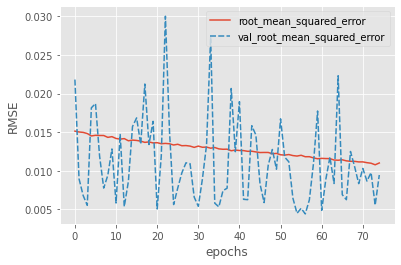

In [ ]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])   